In [32]:
from formulas import *
import math
from sklearn import preprocessing, svm #scale, regresions, cross shuffle stats sepeareate data
from sklearn.model_selection import train_test_split
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler

keras = tf.keras

# set style of charts
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = [15, 8]

import os
from tensorflow import keras
from tensorflow.keras.models import load_model

In [33]:
df = yf.Ticker('AAPL').history(period="max").reset_index()
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
10827,2023-11-22 00:00:00-05:00,191.490005,192.929993,190.830002,191.309998,39617700,0.0,0.0
10828,2023-11-24 00:00:00-05:00,190.869995,190.899994,189.250000,189.970001,24048300,0.0,0.0
10829,2023-11-27 00:00:00-05:00,189.919998,190.669998,188.899994,189.789993,40552600,0.0,0.0
10830,2023-11-28 00:00:00-05:00,189.779999,191.080002,189.399994,190.399994,38415400,0.0,0.0


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

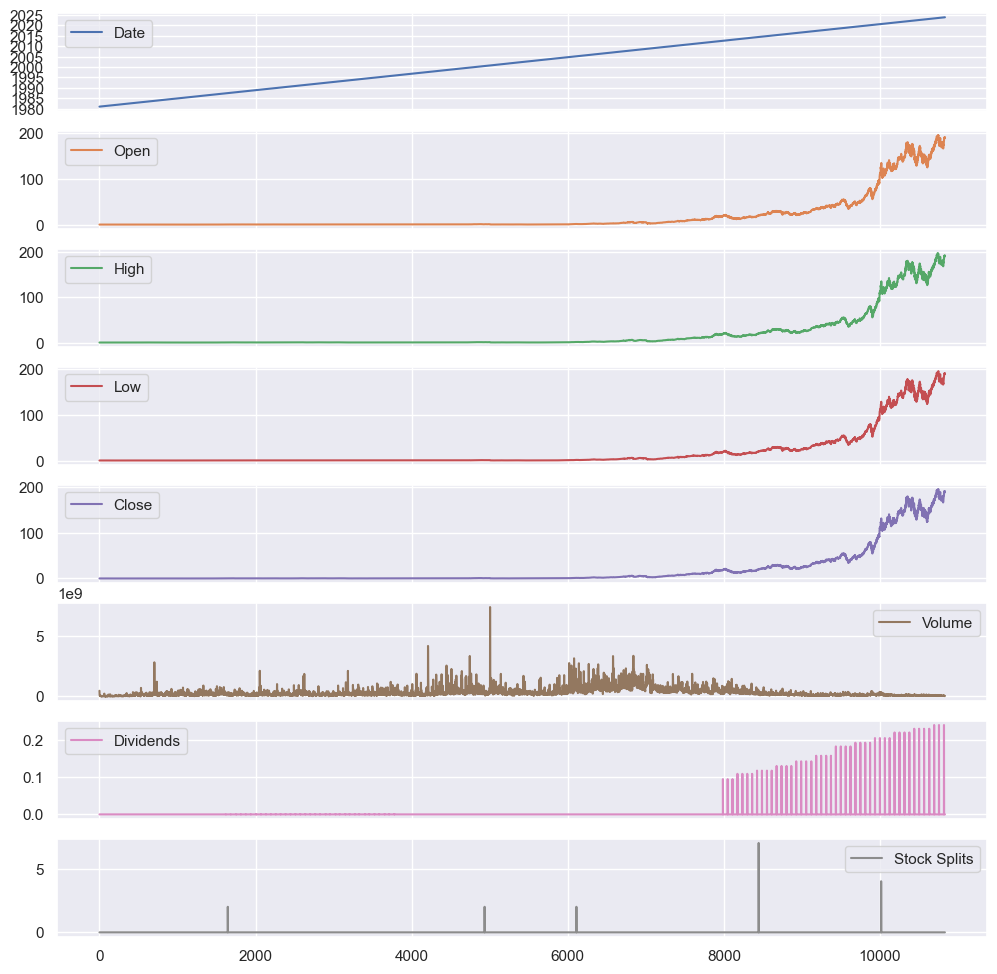

In [34]:
df.plot(kind="line",figsize=(12,12),subplots=True)

In [35]:
df.shape

(10832, 8)

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df[['Close']].values  # Use 'Close' prices as a feature (you can use more features if available)
y = df['Close'].shift(-1).values  # Shift the 'Close' prices by one day to predict the next day's price

# Drop the last row from X to make X and y have the same number of samples
X = X[:-1]
y = y[:-1]

# Step 3: Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Normalize and reshape the dataset for compatibility with the model
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for LSTM-CNN model compatibility
X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

# Print the shapes of the data to verify compatibility
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7581, 1, 1)
X_test shape: (3250, 1, 1)
y_train shape: (7581,)
y_test shape: (3250,)


In [37]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Reshape to (samples, timesteps * features) for scaling
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalize the dataset
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train shape: (7581, 1, 1)
X_test shape: (3250, 1, 1)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, Dense, Dropout
import numpy as np

# Define the number of epochs and batch size
epochs = 25
batch_size =32

# CNN layers
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

# Repeat the vector to match the LSTM input requirements
model.add(RepeatVector(X_train.shape[1]))

# LSTM layers
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)


Epoch 1/25
237/237 [==============================] - 15s 53ms/step - loss: 78711936.0000
Epoch 2/25
237/237 [==============================] - 14s 60ms/step - loss: 2089.8523
Epoch 3/25
237/237 [==============================] - 13s 55ms/step - loss: 2013.6078
Epoch 4/25
237/237 [==============================] - 12s 52ms/step - loss: 1990.9515
Epoch 5/25
237/237 [==============================] - 10s 44ms/step - loss: 1924.9458
Epoch 6/25
237/237 [==============================] - 14s 61ms/step - loss: 2001.3054
Epoch 7/25
237/237 [==============================] - 16s 68ms/step - loss: 1845.3058
Epoch 8/25
237/237 [==============================] - 16s 68ms/step - loss: 1815.1414
Epoch 9/25
237/237 [==============================] - 13s 54ms/step - loss: 1752.6843
Epoch 10/25
237/237 [==============================] - 11s 48ms/step - loss: 1709.4526
Epoch 11/25
237/237 [==============================] - 13s 57ms/step - loss: 1696.9578
Epoch 12/25
237/237 [===========================

In [38]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Reshape to (samples, timesteps * features) for scaling
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalize the dataset
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train shape: (7581, 1)
X_test shape: (3250, 1)


In [39]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# Define base regressors
rf_regressor = ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
gb_regressor = ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
xgb_regressor = ('xgb', XGBRegressor(n_estimators=100, random_state=42))

# Create a stacking ensemble regressor
stacking_regressor = StackingRegressor(
    estimators=[rf_regressor, gb_regressor, xgb_regressor],
    final_estimator=LinearRegression(),
)

In [40]:
# Fit the stacking regressor on the training data
stacking_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = stacking_regressor.predict(X_test)
y_pred

array([0.10297402, 0.19201019, 5.19260023, ..., 0.23936192, 0.09787638,
       0.19349799])

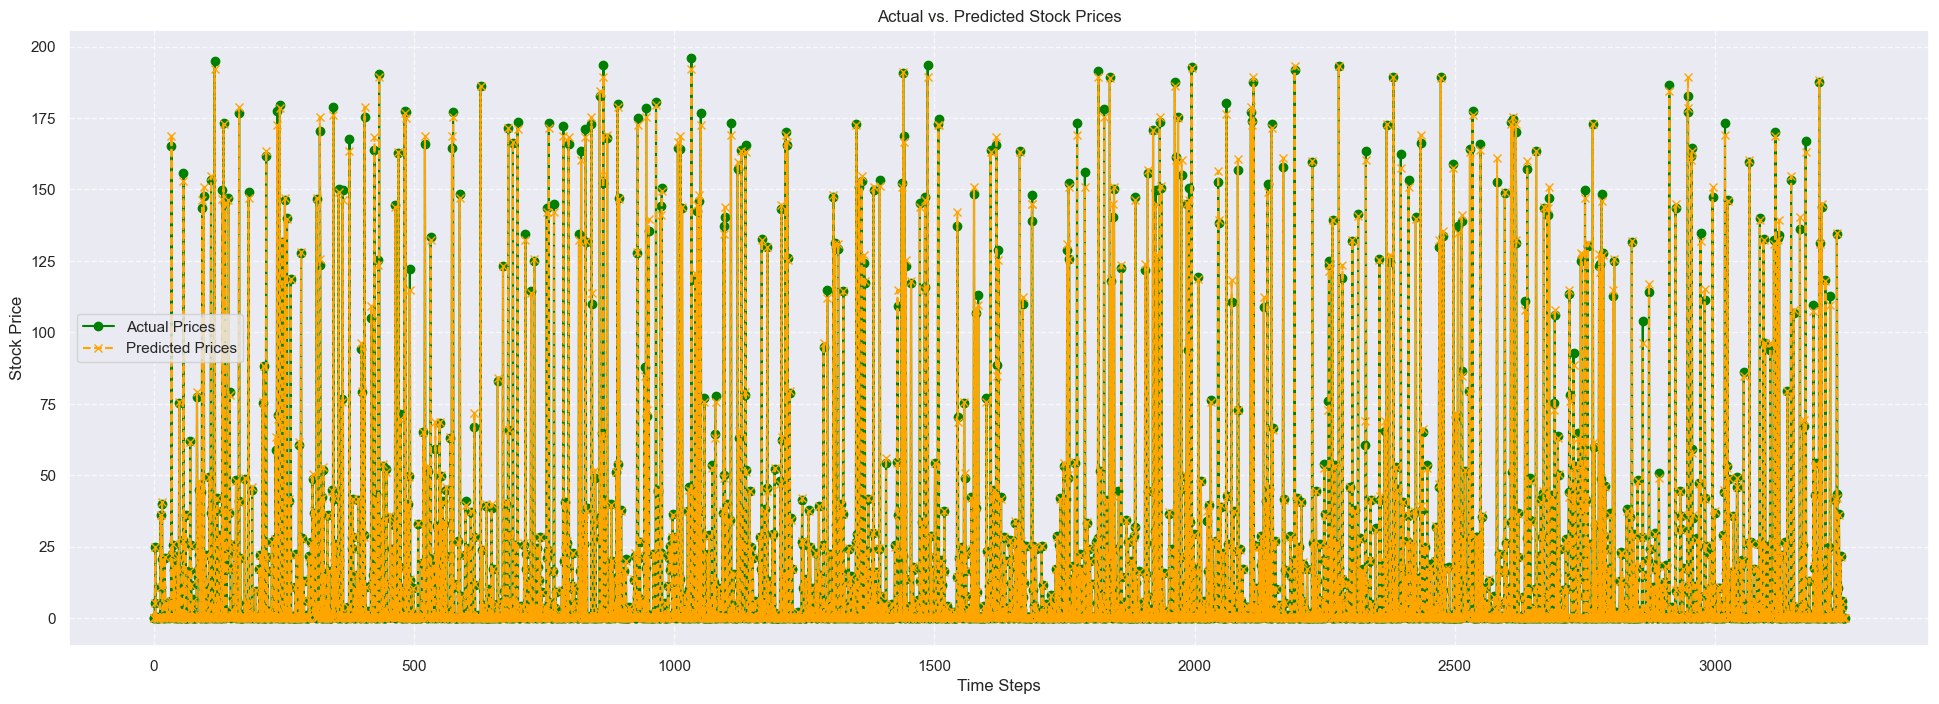

In [41]:
import matplotlib.pyplot as plt

# Function to plot time series data with customizable linestyle and marker
def plot_series2(time, series, label=None, color=None, linestyle='-', marker='o'):
    plt.plot(time, series, label=label, color=color, linestyle=linestyle, marker=marker)
    plt.xlabel("Date")
    plt.ylabel("Price")
    if label:
        plt.legend(fontsize=12)
    plt.grid(True)
    
    
plt.figure(figsize=(24, 8))
time_steps = range(len(y_test))

# Plot actual prices with a green zigzag line
plt.plot(time_steps, y_test, label='Actual Prices', color='green', linestyle='-', marker='o')

# Plot predicted prices with an orange zigzag line
plt.plot(time_steps, y_pred, label='Predicted Prices', color='orange', linestyle='--', marker='x')

plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines with dashed style for a zigzag appearance
plt.show()


In [42]:
# Calculate mean absolute error (MAE), root mean square error (RMSE), and R-squared (R2)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.2856629501448673
Root Mean Square Error (RMSE): 0.828138282565862
R-squared (R2): 0.9995969242545579
